<h1>Simple Linear Regression</h1>

Let's put what we leanred about the simple linear regression into action. In particular, we build some models based on the given data and interpret the results both statistically and visually.

In this example we use the heights dataset that is freely available at http://users.stat.umn.edu/~sandy/alr3ed/website/R.html. 

In [4]:
# loading the dataset
## Original Source: http://users.stat.umn.edu/~sandy/alr3ed/website/R.html
## also available as a part of alr3 package: install.packages("alr3", dependencies=TRUE)
heights <- read.csv('./heights.txt', sep = ' ')
head(heights)

Mheight,Dheight
59.7,55.1
58.2,56.5
60.6,56.0
60.7,56.8
61.8,56.0
55.5,57.9


The `heights` contains 1375 observations (i.e. rows) and two variables (i.e. colomns): `Mheight` and `Dheight` which represnt mothers' and daughters' heiths in inches, respectively. To get a sense of the data one can run any (or all!) of the follwoing statements:
```r
str(heights)
summary(heights)
boxplot(heights)
```
Here, we are interested to study the relationship between these two variables. Therefore, we start with plotting the obserations, then calculating the correlation coefficients. Finally, we perform a linear regression analysis.

# Plotting the Dataset

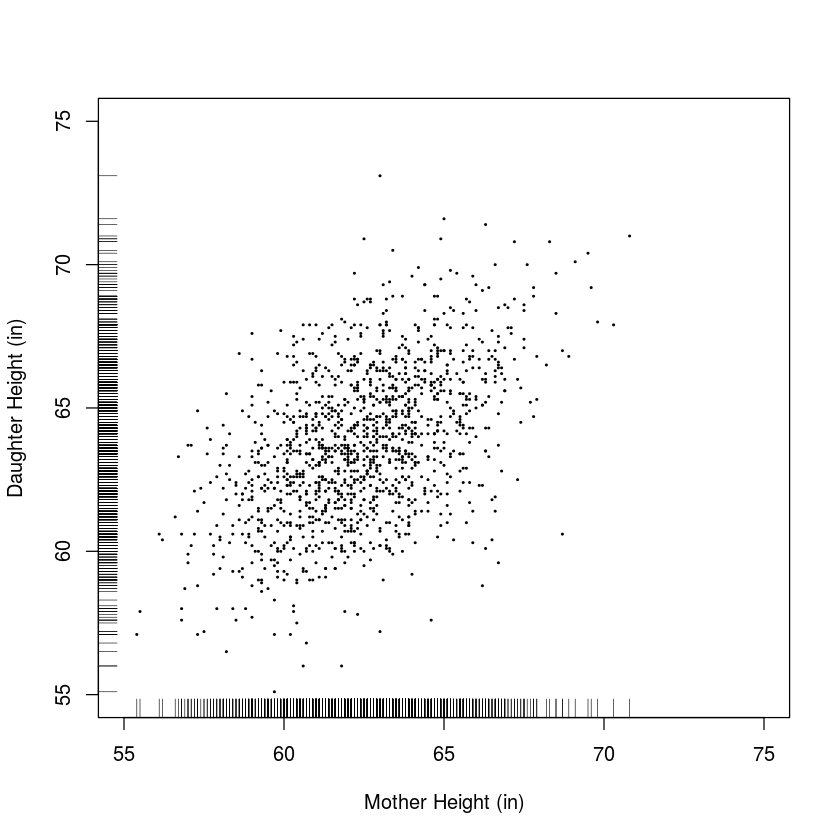

In [5]:
with(heights,{						# `with` hellps us to avoid repeating the dataframe name so many times.
  plot(Mheight,						# the variable in the x axis
       Dheight,						# the variable in the y axis
       xlim=c(55,75),				# the x axis bounds
       ylim=c(55,75),				# the y axis bounds
       pch=20,						# type of the marker
       cex=.3,						# the marker size
       xlab='Mother Height (in)',	# the x axis label
       ylab='Daughter Height (in)')	# the y axis label
     rug(Mheight, side = 1)			# the rug lines at the bottom
     rug(Dheight, side = 2)			# the rug lines at the left
});

# Correlation
In this part, we calculate the correlation coefficent using the `cor` function.

In [6]:
cor(heights$Mheight,heights$Dheight)

[1] 0.4907094

Note that the correlation between x and y is the same as the correlation between y and x.

In [7]:
cor(heights$Mheight,heights$Dheight) == cor(heights$Dheight,heights$Mheight)

[1] TRUE

**Quiz:** write a one line script that clculates the correlation coefficent witough using `cor` function. Then, compare your result with the above valu. Do they agree?

# Regression Lines
Let's add two regression lines to the previous plot; one represent a complete correlatin (identical variables) adn the other one based on the least squared error. 

To build a simple linear regression model on our data, we simply follow this formula:
```R
lm(formula = Dheight ~ Mheight, data = heights) # the verbus version
lm(Dheight ~ Mheight, heights) # the brief version
```
Here we simply plot the resulting regression line. In the next section, we will discuss the `lm` output in more details.

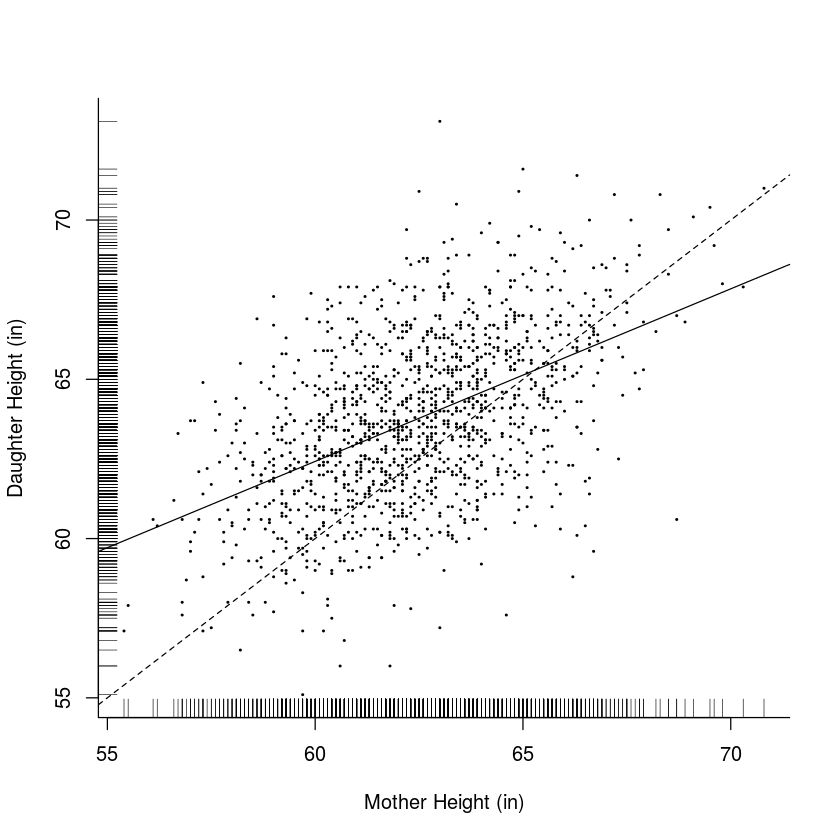

In [8]:
# build the model
model <- lm(formula = Dheight ~ Mheight, data = heights)
# the main plot
with(heights,{						# `with` hellps us to avoid repeating the dataframe name so many times.
  plot(Mheight,						# the variable in the x axis
       Dheight,						# the variable in the y axis
       pch=20,						# type of the marker
       cex=.3,						# the marker size
       bty= 'l',					# alter the box around the plot to an L shape box
       xlab='Mother Height (in)',	# the x axis label
       ylab='Daughter Height (in)')	# the y axis label
     rug(Mheight, side=1)			# the rug lines at the bottom
     rug(Dheight, side=2)			# the rug lines at the left
});
# identity line
abline(0, 1, lty=2)									# dashed: the line with beta_0 = 0 and beta_1 = 1
abline(model, lty=1)	# solid: the best fit line according to the least squared error 

In the above plot, the daughters' heights are expected to be larger than their mothers where the solid line is above the dashed ine, and vice versa.

# Interpretation
In this part, we discuss the output of the `lm` function.

In [13]:
model <- lm(Dheight ~ Mheight,heights)



Call:
lm(formula = Dheight ~ Mheight, data = heights)

Coefficients:
(Intercept)      Mheight  
    29.9174       0.5417  


Just calling the `lm` function gives a minimum outpu including the intercept and slope (beta values in general). To see a more comprehensive output, let's call `summary` function to see the detailed results.

In [14]:
summary(model)


Call:
lm(formula = Dheight ~ Mheight, data = heights)

Residuals:
   Min     1Q Median     3Q    Max 
-7.397 -1.529  0.036  1.492  9.053 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.91744    1.62247   18.44   <2e-16 ***
Mheight      0.54175    0.02596   20.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.266 on 1373 degrees of freedom
Multiple R-squared:  0.2408,	Adjusted R-squared:  0.2402 
F-statistic: 435.5 on 1 and 1373 DF,  p-value: < 2.2e-16


Let's go through the outputs one by one.

```R
Call:
lm(formula = Dheight ~ Mheight, data = heights)
```
The very first part of the output only shows the arguments of the function that we just called:

```R
Residuals:
   Min     1Q Median     3Q    Max 
-7.397 -1.529  0.036  1.492  9.053 
```
The second part shows the quartiles of the residuals. As we know, the residuals are defined as the difference between the observed values and the predicted values (i.e. $y_i - \hat{y_i}$). The residual quartiles help us to investigate whether the residuals look normally distributed around zero or not. To have a nearly normal distribution, the mean of the median of the residuals should be close to 0 (zero-centered), and the magnitude of the min and max  values as well as 1Q and 3Q  values should be close to each other (symetrical). Normally distributed residuals indicate that the likelihood of a significant miss gets smaller as the distance from the actual value gets larger. It also shows that the likelihood of overestimating and underestimating are almost equal.

```R
Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.91744    1.62247   18.44   <2e-16 ***
Mheight      0.54175    0.02596   20.87   <2e-16 ***
```
The third part is all about the coefficients (or simply our $\beta$ values) and contains five columns. 
    
   1. The first column shows the estimated coefficients which its first row is always the intercept (i.e. $\beta_0$). In the case of a simple linear regression with only one numerical predictors, we can use these values to plot the regression lines.

   2. The second column is the standard error of the estimated coefficients which measures their variability. Obviously, the lower the error the better the fit. However, we should note that these values are relative to the magnitude of the $\beta$ values. For example, we observe that the standard error for the intercept is 1.62247 while this value for the slope is 0.02596. These values should not surprise us as the magnitudes of the intercept and the slope in this example are very different (29.91744 and 0.54175, respectively).

   3. The third column of this table contains the t-values of the estimated coefficients. These values are not informative per se, unless we use them to calculate other statistics e.g. p-values which already calculated and shown in the next column.

   4. The fourth column, as just mentioned, shows the p-values. As a rule of thumb, the lesser the p-value the more descriptive the predictor variable is. This is because the null hypothesis of the performed t-test is that the predictor does not explain the response variable. As a result, we can interpret the p-values as the probability the variable is irrelevant. In our example, both p-values are really small, means the selected variables (think of intercept as a variable which is always 1) are chosen correctly.

   5. The last column is nothing but a visualization of the importance of a variable which is calculated based on the p-values from the previous column. Generally. the motre star you get, the more relevant the variable is. The line bellow the table (`Signif. codes`) explains the thresholds that define the number of stars.


```R
Residual standard error: 2.266 on 1373 degrees of freedom
```
The fourth part of the results contains two numbers: the residual standard error and the degree of freedom. The first number is the standard deviation of the residuals which for a good fit should be proportional to the quantiles of the residuals in part one. For a normal distribution, the 1Q and 3Q should be almost 1.5 +/- the standard error. 

The second number (i.e. the degrees of freedom) is simply the difference between the number of observations (`1375` in this example) and the number of variables used in the model (here two: one is intercept and the other one is the slope).

```R
Multiple R-squared:  0.2408,	Adjusted R-squared:  0.2402
```
As itself spells out, the fifth part of the output is the r-squerred or $R^2$. We previously calculated correlation coefficient (`0.4907`) and the $R^2$ is nothing but `0.4907^2=0.2408`.

Generally speaking,  $R^2$ evaluates the goodness of the fit which the higher is the better (note that its upper bound is `1`). This value shows the amount of variability in the estimated response variable that is explained by the model. In our example,  almost 24% of the cause for a daughter's height can be explained by her mother's height. 

The adjusted $R^2$ does not make a lot of sense in the case of a single predictor variable. However, in multiple linear regression (i.e. when the number of variables is more than one), we need to adjust $R^2$ according to the number of modeled variables because as the number of variable increases the $R^2$ also grows regardless of the model being improved or not. As a result, the adjusted $R^2$ would be a more accurate metric than the original $R^2$.

```R
F-statistic: 435.5 on 1 and 1373 DF,  p-value: < 2.2e-16
```
Finally, the last line shows the F-statistics. In particular, `lm` function performs an F-test on the learned model by comparing it with a model that has fewer parameters. In our example, this might be meaningless as we only have one predictor variable. However, the case of multiple linear regression, the model with more parameters should theoretically fit better. If the model with more parameters (the current model) doesn't perform any better than the model with fewer parameters, then the F-test will have a high p-value. In this case, we may consider removing some of the variables to lessen the complexity of the model. The degrees of freedom (indicated by `DF`) is the variables in the model. 

# Visual Diagnostics
Beside the information available in the output of `lm` function (and probably an `anova` test on top of that), it usually beneficial to plot the model and residuals for further investigations. Unsurprisingly, this is very easy to achive in R. In the followings we provide some basic plots and visually inspect the outcome of the models.

**Note:** a detail explanation of each plot is beyond the scope of this unit. For more information please refer to: http://data.library.virginia.edu/diagnostic-plots/ , http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/ , https://rpubs.com/gonzalo/27879, or http://stats.stackexchange.com/questions/58141/interpreting-plot-lm .

##  Residuals Histogram/Density Plot
The simplest plot we can draw to visually diagnose the `lm` output is the histogram or density plot of the residuals. For a good model, we expect a nearly normal distribution residuals which should result in a bell-shape plot centered close to zero.

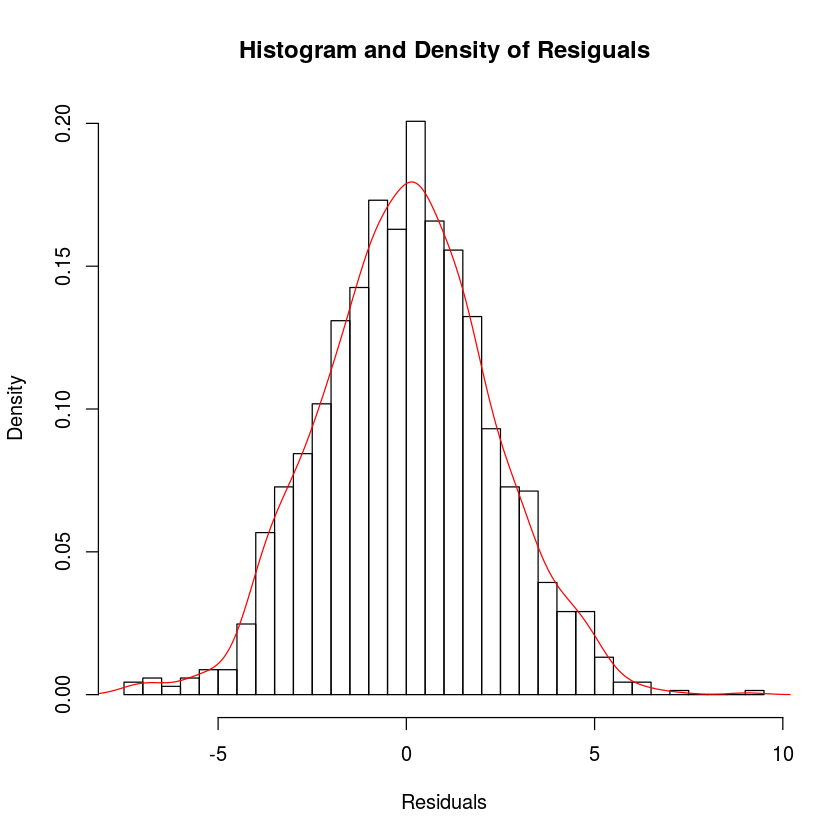

In [20]:
hist(model$residuals,								# draw the histogram of residuals
     breaks = 50,									# number of breaks
     main = 'Histogram and Density of Resiguals',	# main title
     xlab='Residuals',								# x-axis label
     probability=TRUE)								# scale it to [0,1]. otherwise we cann't plot density curve of top of it

lines(density(model$residuals),						# draw density curve of residuals
      col = 'red'									# color it as red
     )

The above plot confirms that the linear model fitted to the dataset as both histogram and density curve show a nearly normal distribution of residuals.

Let's draw some more advanced plots.

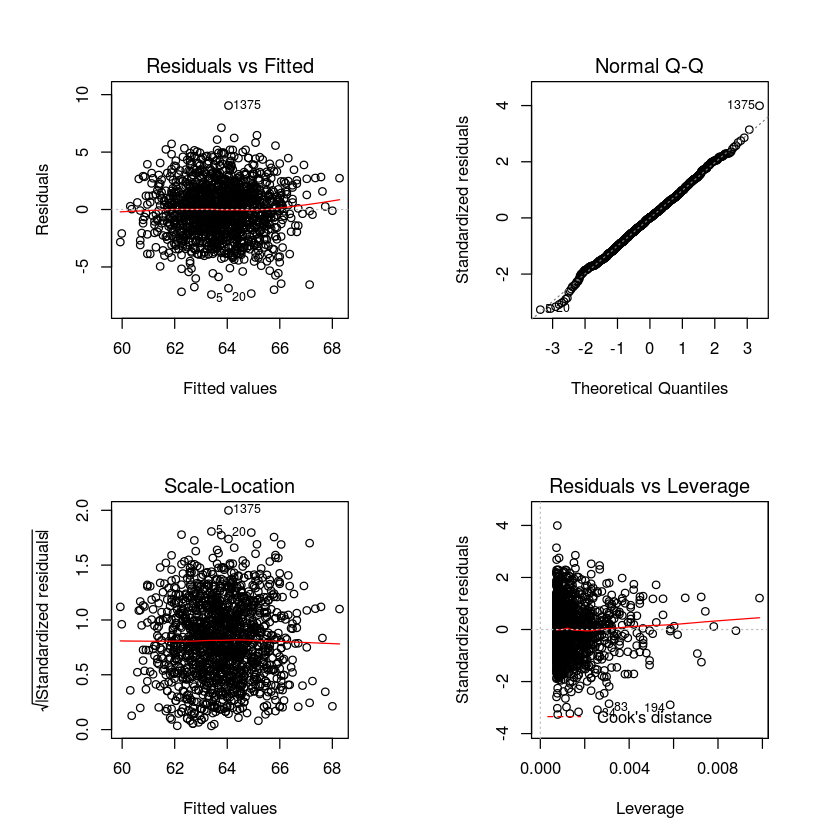

In [23]:
par(mfrow=c(2,2), pty = 's')							# to specify the arrangement of the four subplots (2X2)
plot(model)	# simply plot the model!

## Residuals vs Fitted Plot
For a good fit, we are looking for a residuals almost evenly distributed around zero line without any visible pattern. This particular plot (top left) in the example looks fine! For more readings refer to http://stats.stackexchange.com/questions/52089/what-does-having-constant-variance-in-a-linear-regression-model-mean/52107#52107

## Normal Q-Q Plot
In this plot we are interested on points located as close to the dashed line as possible. Any particular pattern rather than this may indicate a problem in the chose of model both in terms of the selected variables(s) and the degree of the model. Again the plot in this example seems alright! For more information refer to: http://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

# Prediction
Here we want to predict the height of an imaginary daughter based on her imaninary mother's height. To do so, we need to build a model using our training data (`lm`), then feed the model with the mother's height to estimate the daughter's height (`predict`).

In [22]:
# learn and store the model
model <-lm(formula = Dheight ~ Mheight, data = heights)

# create a new data set with four synthetic observations
new <- data.frame(Mheight = c(44.44, 55.55, 66.66, 77.77))

# use the model for prediction
new$Dheight <- predict(model, newdata = new)

# display the observations and predictions
new

Mheight,Dheight
44.44,53.99267
55.55,60.01148
66.66,66.03029
77.77,72.04910
